# First look at MOM6 output
A series of commands to quickly look at the output of a MOM6 simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cftime

/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
rootdir = '/archive/gam/MOM6/'
config = 'channel/8th-deg'
filename_prog = 'prog.nc'
filename_prog_2d = 'prog_2d.nc'
filename_vgrid = 'Vertical_coordinate.nc'
filename_hgrid = 'ocean_geometry.nc'
filename_stats = 'ocean.stats.nc'

In [3]:
prog=xr.open_dataset(rootdir+config+'/'+filename_prog,decode_times=False)
print(prog)

<xarray.Dataset>
Dimensions:  (Time: 81, xh: 480, xq: 480, yh: 320, yq: 320, zl: 50)
Coordinates:
  * xq       (xq) float64 0.125 0.25 0.375 0.5 0.625 ... 59.62 59.75 59.88 60.0
  * yh       (yh) float64 -64.94 -64.81 -64.69 -64.56 ... -25.31 -25.19 -25.06
  * zl       (zl) float64 0.5 2.674 7.309 14.58 ... 3.588e+03 3.75e+03 3.916e+03
  * Time     (Time) float64 30.0 60.0 90.0 120.0 ... 2.37e+03 2.4e+03 2.43e+03
  * xh       (xh) float64 0.0625 0.1875 0.3125 0.4375 ... 59.69 59.81 59.94
  * yq       (yq) float64 -64.88 -64.75 -64.62 -64.5 ... -25.25 -25.12 -25.0
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    PV       (Time, zl, yq, xq) float32 ...
    temp     (Time, zl, yh, xh) float32 ...
    salt     (Time, zl, yh, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      channel_8th-deg
    grid_type:  regular
    grid_tile:  N/A


In [4]:
prog_2d=xr.open_dataset(rootdir+config+'/'+filename_prog_2d,decode_times=False)
print(prog_2d.heat_added)

<xarray.DataArray 'heat_added' (Time: 488, yh: 320, xh: 480)>
[74956800 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 0.0625 0.1875 0.3125 0.4375 ... 59.69 59.81 59.94
  * yh       (yh) float64 -64.94 -64.81 -64.69 -64.56 ... -25.31 -25.19 -25.06
  * Time     (Time) float64 5.0 10.0 15.0 20.0 ... 2.43e+03 2.435e+03 2.44e+03
Attributes:
    long_name:     Flux Adjustment or restoring surface heat flux into ocean
    units:         W m-2
    cell_methods:  area:mean yh:mean xh:mean time: point


In [5]:
stats=xr.open_dataset(rootdir+config+'/'+filename_stats)
#print(stats)

In [6]:
hgrid=xr.open_dataset(rootdir+config+'/'+filename_hgrid)
vgrid=xr.open_dataset(rootdir+config+'/'+filename_vgrid)
#print(hgrid)
#print(vgrid)

# Plan view at different moments in time

In [7]:
# Plan view of  of variable at start and end of simulation
def draw_var_times_plan(var,clim,times,invert):
    nt = np.size(times)
    fig,ax = plt.subplots(figsize=(10,3*nt),nrows=np.size(times))
    for t in range(nt):
        im = ax[t].pcolormesh(hgrid.lonh,hgrid.lath,var.sel(Time=times[t],method='nearest'),cmap="RdBu")
        im.set_clim(vmin=clim[0],vmax=clim[1])
        cbar = plt.colorbar(im,ax=ax[t])
        ax[t].set_title(times[t])
        if invert:
            ax[t].invert_yaxis()

In [8]:
get_times = [360,720,1080,1440,1800,2160,2520]

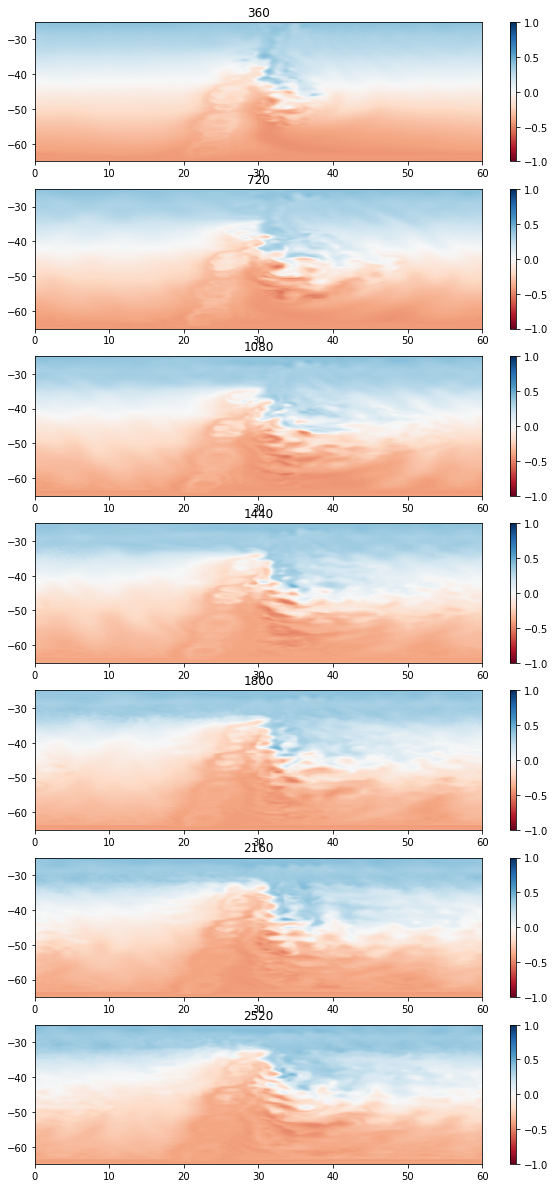

In [9]:
draw_var_times_plan(var=prog_2d.SSH,clim=[-1,1],times=get_times,invert=False)

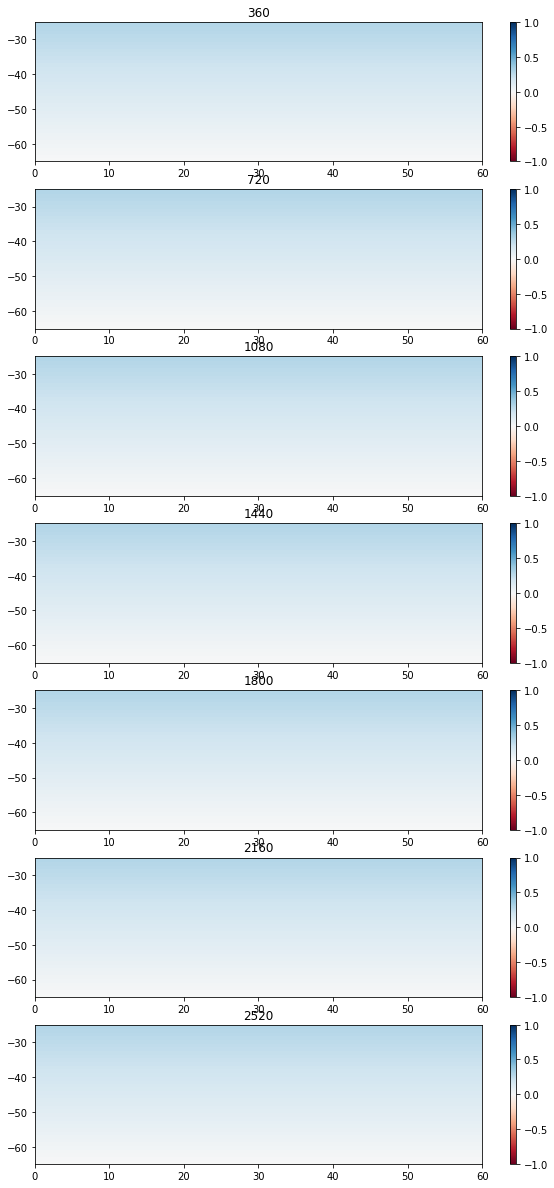

In [10]:
draw_var_times_plan(var=prog_2d.heat_added,clim=[-1,1],times=get_times,invert=False)

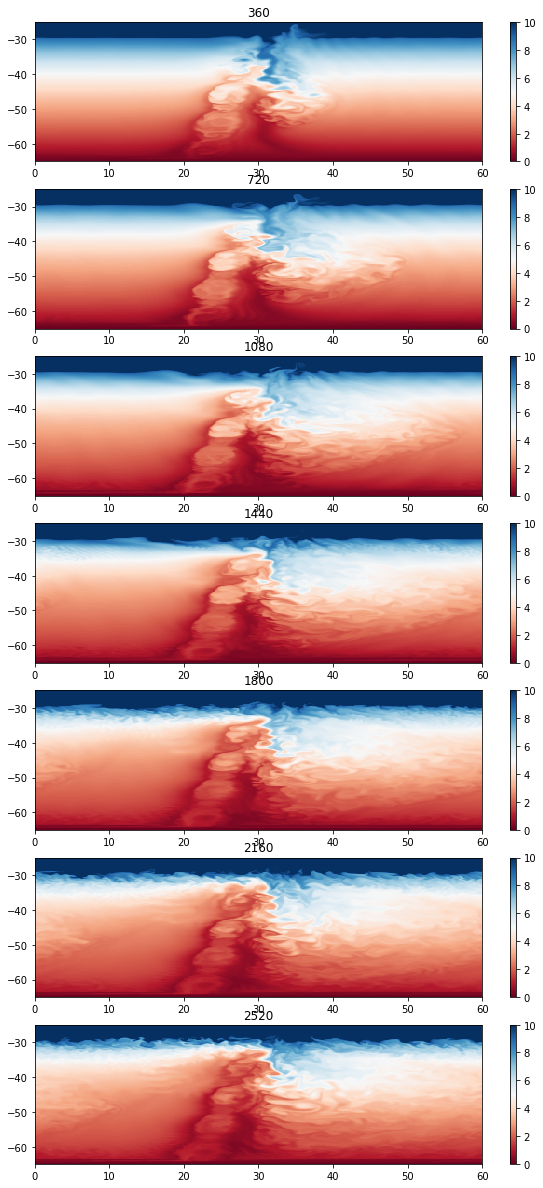

In [11]:
draw_var_times_plan(var=prog.temp.isel(zl=0),clim=[-0,10],times=get_times,invert=False)

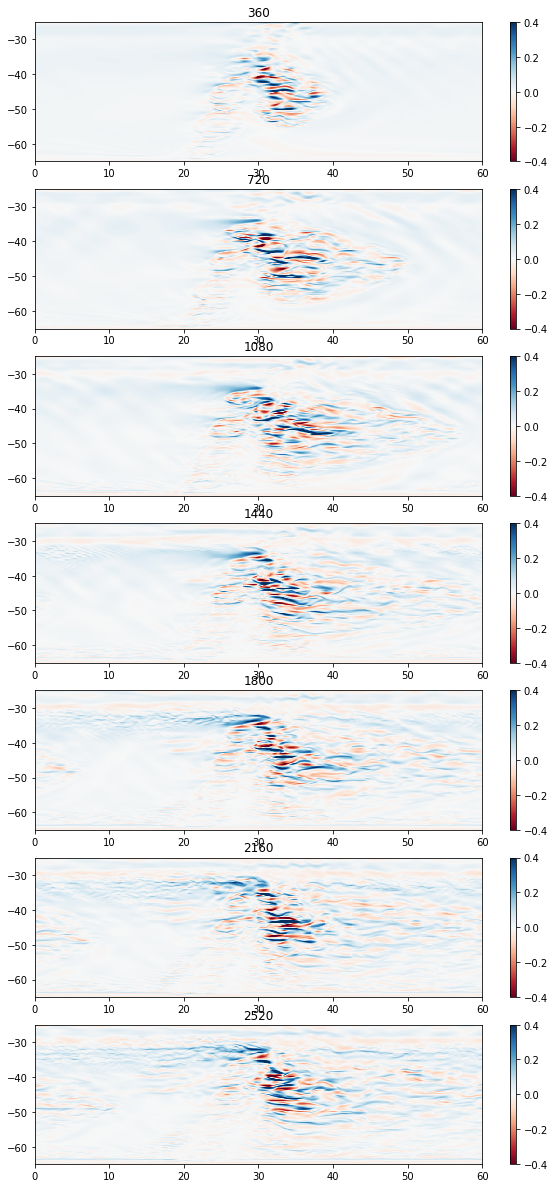

In [24]:
draw_var_times_plan(var=prog.u.sel(zl=100,method='nearest'),clim=[-0.4,0.4],times=get_times,invert=False)

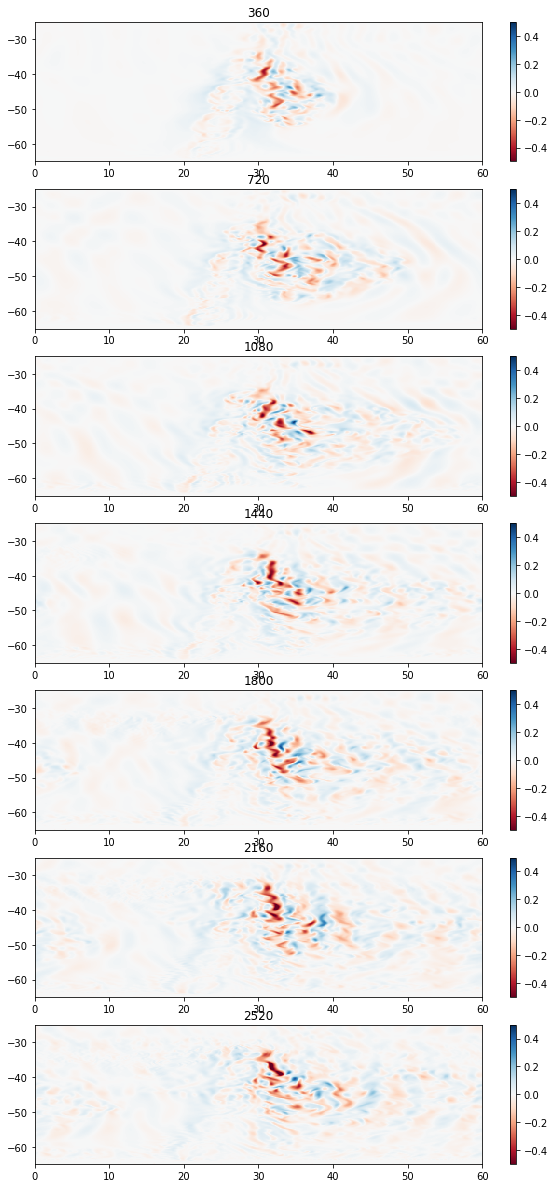

In [48]:
draw_var_times_plan(var=prog.v.isel(zl=20),clim=[-0.5,0.5],times=get_times,invert=False)

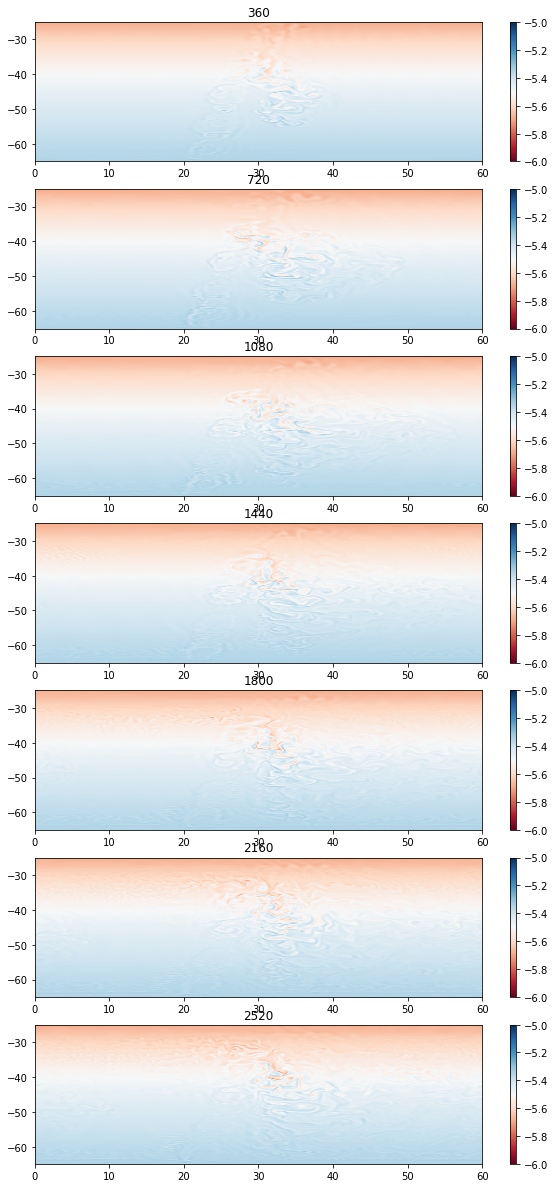

In [76]:
draw_var_times_plan(var=xr.ufuncs.log10(-prog.PV.isel(zl=10)),clim=[-6,-5],times=get_times,invert=False)

In [41]:
# Plan view of  of variable at start and end of simulation
def draw_var_times_latdep(var,clim,times,invert):
    nt = np.size(times)
    fig,ax = plt.subplots(figsize=(10,3*nt),nrows=np.size(times))
    for t in range(nt):
        im = ax[t].pcolormesh(hgrid.lath,vgrid.Layer,var.sel(Time=times[t],method='nearest'),cmap="RdBu")
        im.set_clim(vmin=clim[0],vmax=clim[1])
        cbar = plt.colorbar(im,ax=ax[t])
        ax[t].set_title(times[t])
        if invert:
            ax[t].invert_yaxis()

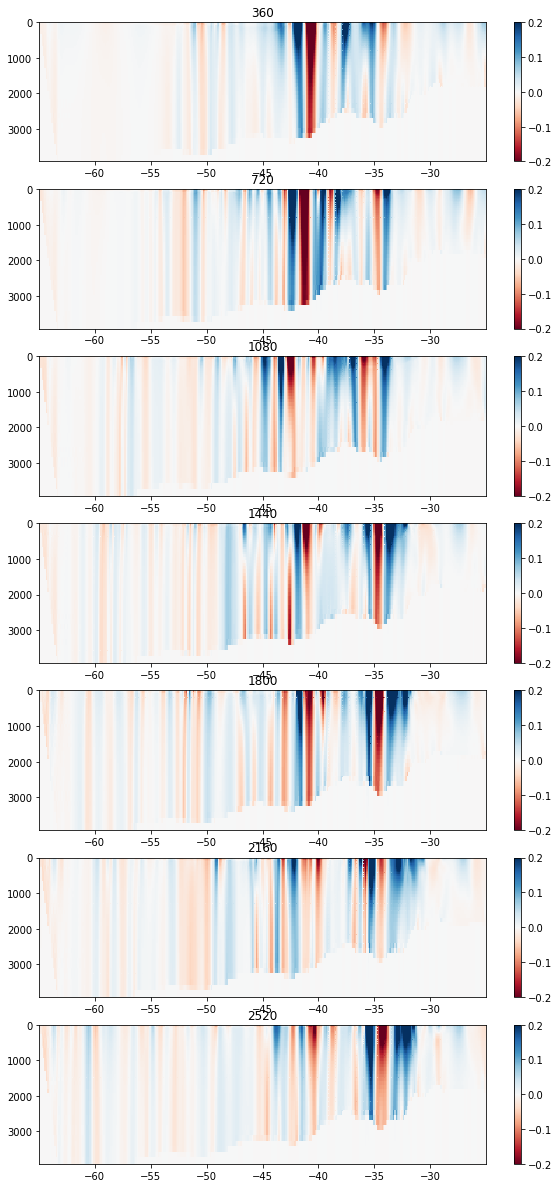

In [42]:
draw_var_times_latdep(var=prog.u.isel(xq=240),clim=[-0.2,0.2],times=get_times,invert=True)

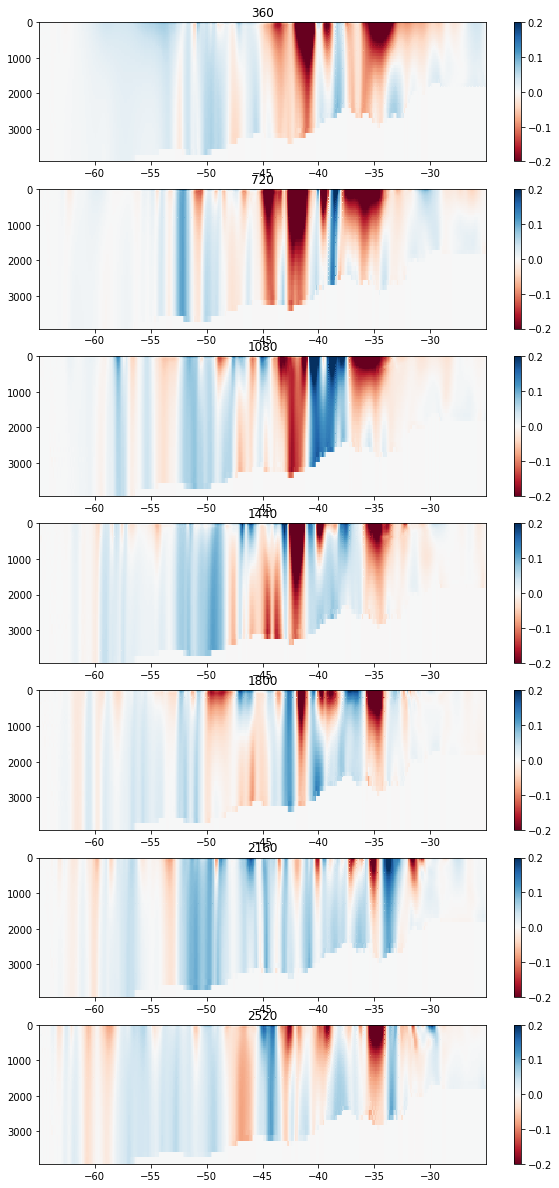

In [43]:
draw_var_times_latdep(var=prog.v.isel(xh=240),clim=[-0.2,0.2],times=get_times,invert=True)

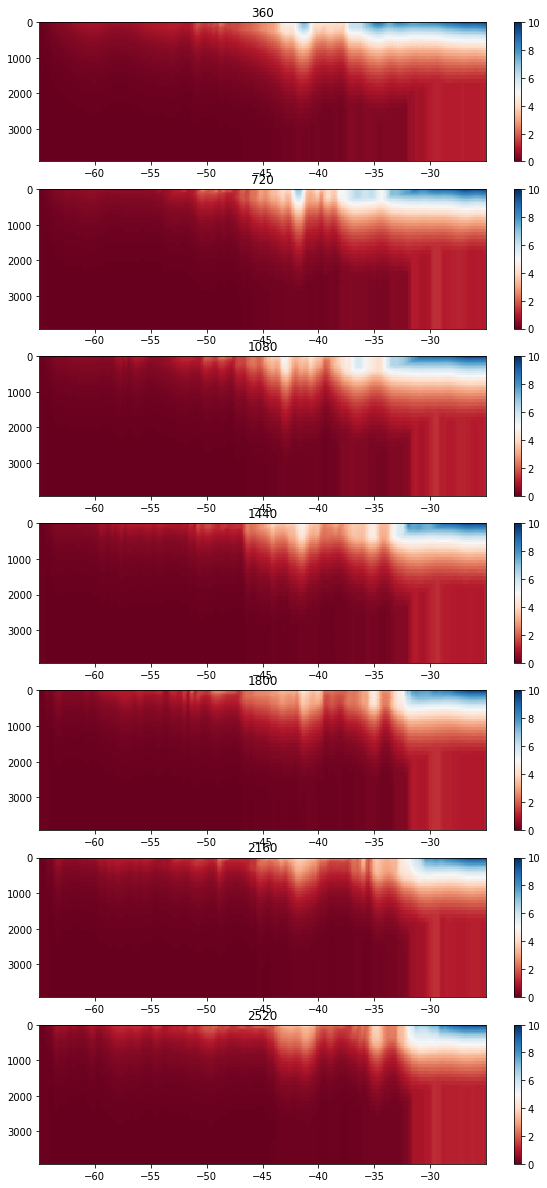

In [44]:
draw_var_times_latdep(var=prog.temp.isel(xh=240),clim=[0,10],times=get_times,invert=True)

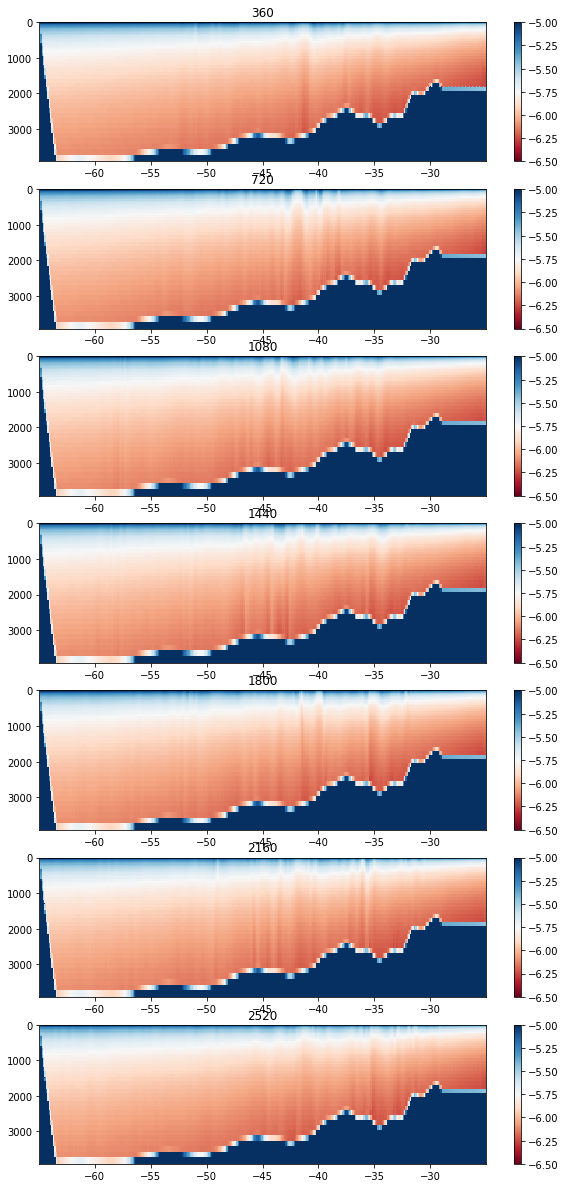

In [79]:
draw_var_times_latdep(var=xr.ufuncs.log10(-prog.PV.isel(xq=240)),clim=[-6.5,-5],times=get_times,invert=True)

# Depth slices at a single moment in time

In [14]:
# Section (lat-lon) of variable at different depths
def draw_var_depths(var,clim,depths):
    nk = np.size(depths)
    fig,ax = plt.subplots(figsize=(10,3*nk),nrows=np.size(depths))
    for d in range(nk):
        im = ax[d].pcolormesh(var.isel(zl=depths[d]),cmap="RdBu")
        im.set_clim(vmin=clim[0],vmax=clim[1])
        cbar = plt.colorbar(im,ax=ax[d])
        ax[d].set_title(depths[d])

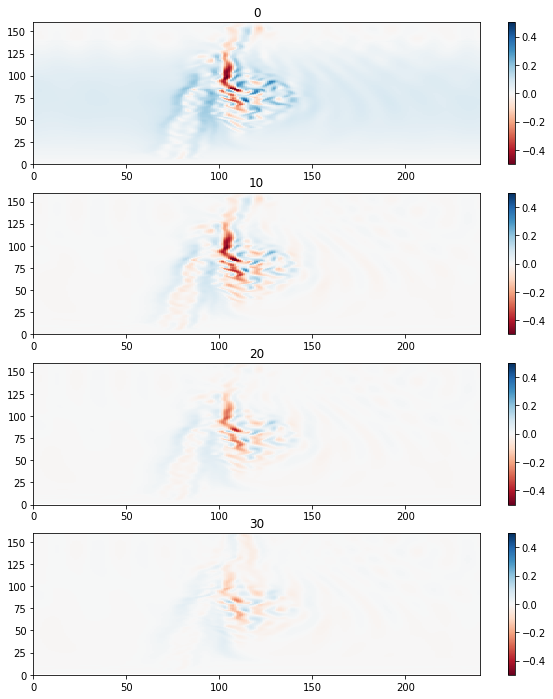

In [17]:
draw_var_depths(var=prog.v.isel(Time=50),clim=[-0.5,0.5],depths=[0, 10, 20, 30])

# Kinetic energy over time

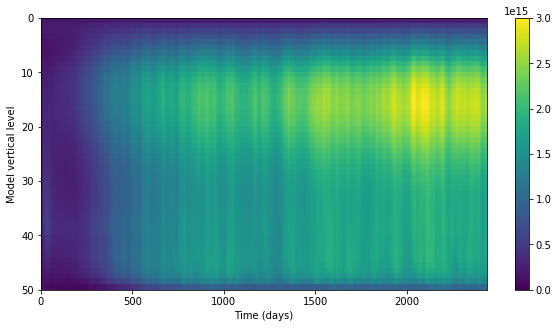

In [68]:
fig,ax = plt.subplots(figsize=(10,5),nrows=1)
im = ax.pcolormesh(stats.KE.transpose())
ax.invert_yaxis()
ax.set_xlabel('Time (days)')
ax.set_ylabel('Model vertical level')
im.set_clim([0,3e15])
cbar = plt.colorbar(im,ax=ax)

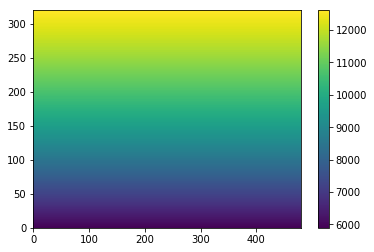

In [26]:
plt.pcolormesh(hgrid.dxT)
plt.colorbar()